<font size=6>**Exploratory Data Analysis**</font>

Plots using the `seaborn` library
___

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
sns.set()

# Import data and compute returns

In [ ]:
returns = pd.read_excel('returns.xlsx').set_index('Date')
returns.head()

,Bond,Commo,SP500,CorpBondLT,CorpBondST
Date,,,,,
2020-01-03,0.010708,0.013505,-0.007572,0.007082,0.001358
2020-01-06,-0.005199,0.000000,0.003815,-0.004395,0.000739
2020-01-07,-0.003945,-0.003029,-0.002812,-0.005003,-0.001108
2020-01-08,-0.004356,-0.018834,0.005329,-0.003747,-0.000617
2020-01-09,0.004176,-0.007430,0.006781,0.007521,0.000617


In [5]:
SP500 = returns['SP500']
SP500.head()

Date
2020-01-03   -0.007572
2020-01-06    0.003815
2020-01-07   -0.002812
2020-01-08    0.005329
2020-01-09    0.006781
Name: SP500, dtype: float64

# Plot the data

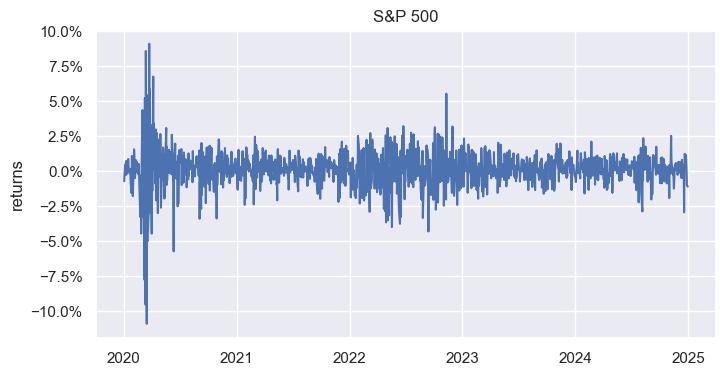

In [6]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(SP500)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.set_ylabel("returns")
ax.set_title("S&P 500");

# Empirical Cumulative Distribution Function

Using seaborn's `ecdfplot()` function, plot the empirical cumulative distribution function of the returns.  
Use the *Axes* object `my_ax` created by the `subplots()` function.  
<https://seaborn.pydata.org/generated/seaborn.ecdfplot.html>

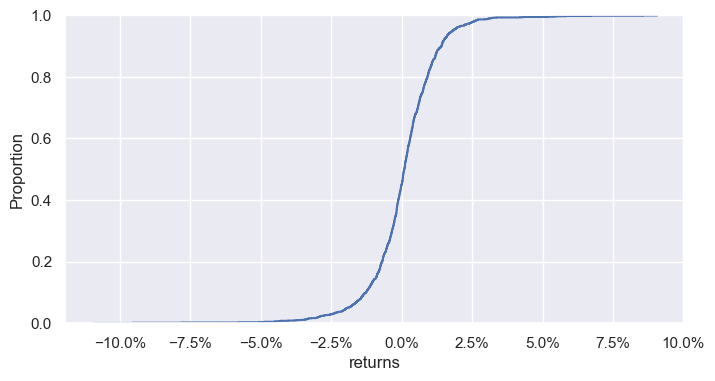

In [7]:
fig, my_ax = plt.subplots(figsize=(8,4))
sns.ecdfplot(SP500, ax=my_ax)
my_ax.xaxis.set_major_formatter(mtick.PercentFormatter(1))
my_ax.set_xlabel("returns");

# Histograms

Plot on `ax` the histogram of the returns.  
Use `matplotlib.axes.Axes.hist` and try different values for the number of bins with the parameter `bins=`.  
https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html

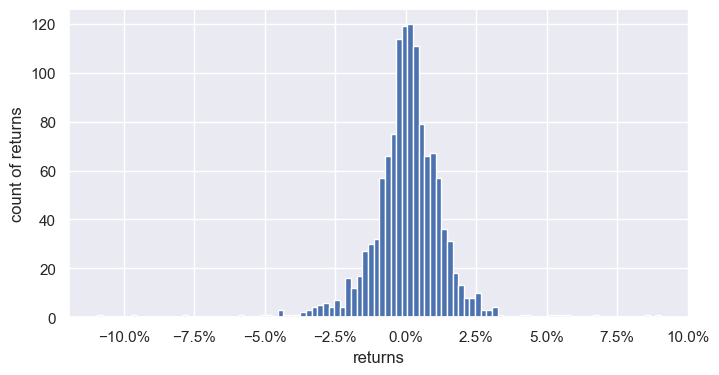

In [12]:
fig, ax = plt.subplots(figsize=(8,4))
ax.hist(SP500,bins=100)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.set_xlabel("returns")
ax.set_ylabel("count of returns");

Same but using `seaborn.histplot` <https://seaborn.pydata.org/generated/seaborn.histplot.html>.

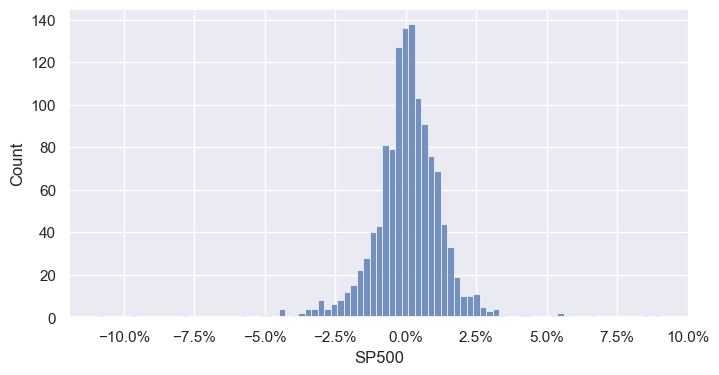

In [13]:
fig, ax = plt.subplots(figsize=(8,4))
sns.histplot(SP500, ax=ax)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1));

# Kernel Density Estimate

Plot on `ax` the KDE of the returns. Use `seaborn.kdeplot` <https://seaborn.pydata.org/generated/seaborn.kdeplot.html>.

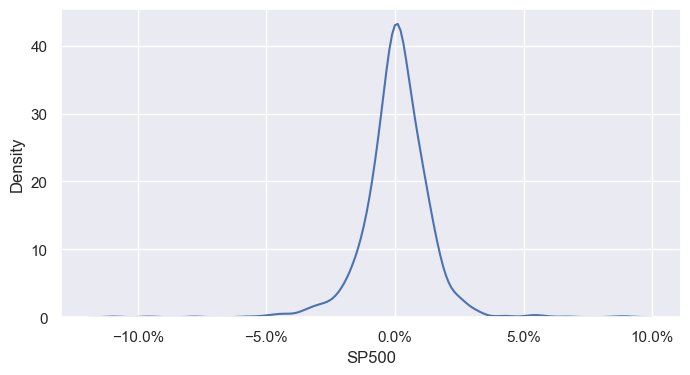

In [17]:
fig, ax = plt.subplots(figsize=(8,4))
sns.kdeplot(SP500 , ax=ax)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1));

Plot an histogram with a KDE using `seaborn.histplot`. Use the option `kde=True`.

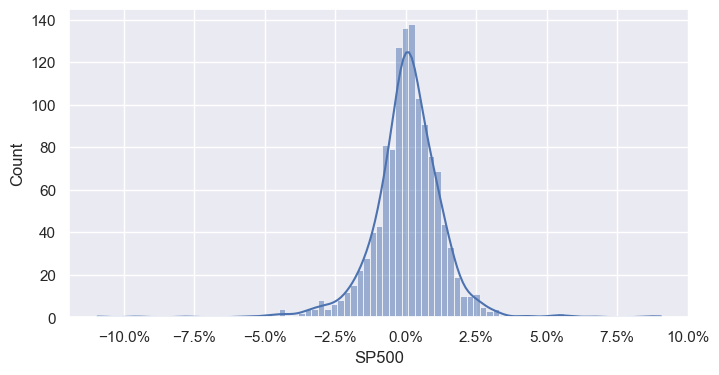

In [7]:
fig, ax = plt.subplots(figsize=(8,4))
sns.histplot(SP500, kde=True, ax=ax)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1));

## Varying colors using a semantic variable

To illustrate the possibilites of seaborn, we transform the DataFrame into a **Long-form** data table.  
<https://seaborn.pydata.org/tutorial/data_structure.html>

In [8]:
returns_longform = returns.stack().reset_index().rename(columns={'level_1': 'name', 0: 'return'}).set_index('Date')
returns_longform.tail(10)

,name,return
Date,,
2024-12-27,Bond,-0.007128
2024-12-27,Commo,0.003749
2024-12-27,SP500,-0.010527
2024-12-27,CorpBondLT,-0.007179
2024-12-27,CorpBondST,-0.000514
2024-12-30,Bond,0.006740
2024-12-30,Commo,0.011204
2024-12-30,SP500,-0.011412
2024-12-30,CorpBondLT,0.005490


Using `kdeplot()`, we add a `hue='name'` parameter that is used to determine the colors.

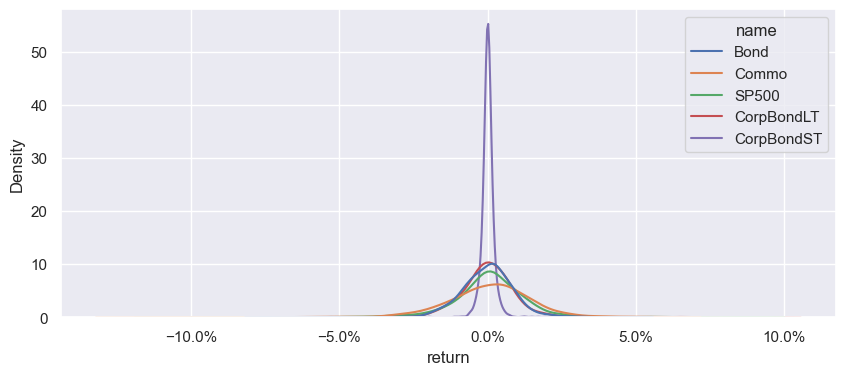

In [12]:
fig, ax = plt.subplots(figsize=(10,4))
sns.kdeplot(data=returns_longform, x='return', hue='name', ax=ax)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1));

Redo the plot without `CorpBondST`.

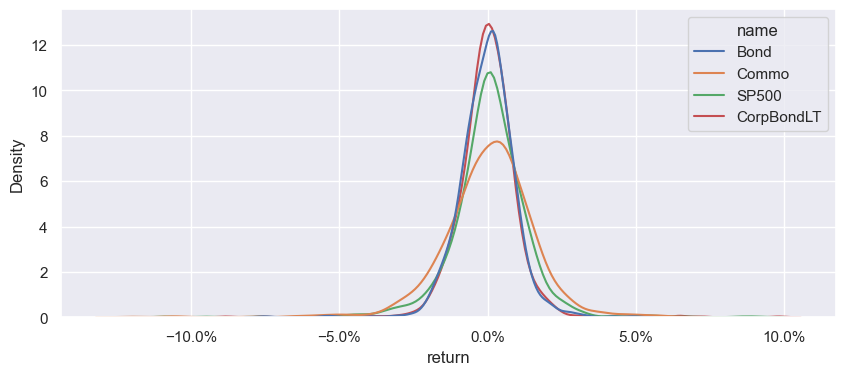

In [11]:
fig, ax = plt.subplots(figsize=(10,4))
sns.kdeplot(data=returns_longform[returns_longform['name'] != 'CorpBondST'], x='return', hue='name', ax=ax)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1));

In [32]:
mask = returns_longform['name'] != 'CorpBondST'
returns_longform[mask]

,name,return
Date,,
2020-01-03,Bond,0.010708
2020-01-03,Commo,0.013505
2020-01-03,SP500,-0.007572
2020-01-03,CorpBondLT,0.007082
2020-01-06,Bond,-0.005199
...,...,...
2024-12-27,CorpBondLT,-0.007179
2024-12-30,Bond,0.006740
2024-12-30,Commo,0.011204


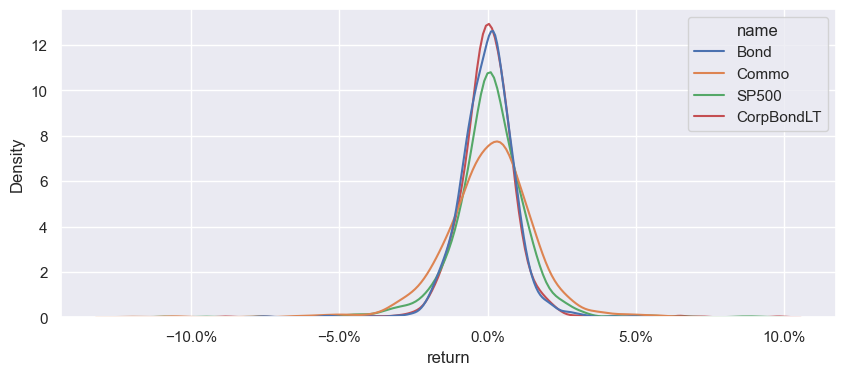

In [33]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.kdeplot(data=returns_longform[mask], x='return', hue='name', ax=ax)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.show()

# Box Plots

Using seaborn's `boxplot()`, plot a boxplot of the returns.  
To show the arithmetic average, add the arguments `showmeans=True`.  
<https://seaborn.pydata.org/generated/seaborn.boxplot.html>

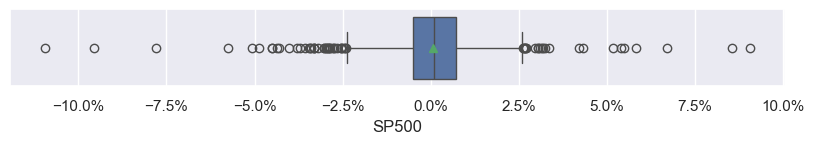

In [13]:
fig, ax = plt.subplots(figsize=(10,1))
sns.boxplot(data=SP500, showmeans=True, orient='h', ax=ax)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1));

Same but comparing three assets (use the long-form table).

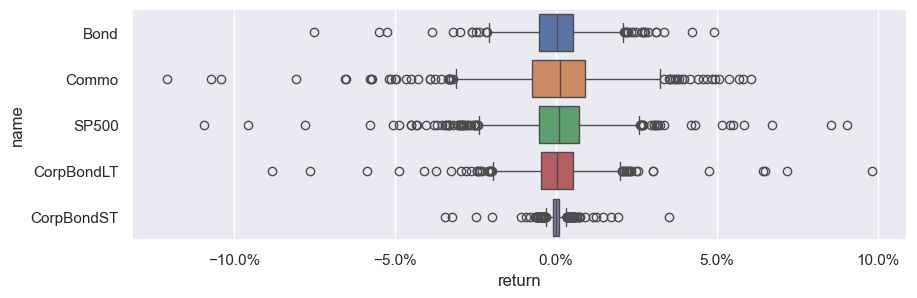

In [14]:
fig, ax = plt.subplots(figsize=(10, 3))
sns.boxplot(data=returns_longform, x='return', y='name', hue='name')
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1));

In [38]:
SP500

,SP500
Date,
2020-01-03,-0.007572
2020-01-06,0.003815
2020-01-07,-0.002812
2020-01-08,0.005329
2020-01-09,0.006781
...,...
2024-12-23,0.005988
2024-12-24,0.011115
2024-12-26,0.000067


In [39]:
np.sort(SP500.values)

array([[-7.57207469e-03],
       [ 3.81497528e-03],
       [-2.81158172e-03],
       ...,
       [ 6.65874993e-05],
       [-1.05265188e-02],
       [-1.14116384e-02]])

In [40]:
SP500.sort_values

<bound method DataFrame.sort_values of                SP500
Date                
2020-01-03 -0.007572
2020-01-06  0.003815
2020-01-07 -0.002812
2020-01-08  0.005329
2020-01-09  0.006781
...              ...
2024-12-23  0.005988
2024-12-24  0.011115
2024-12-26  0.000067
2024-12-27 -0.010527
2024-12-30 -0.011412

[1256 rows x 1 columns]>